In [1]:
import glob
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import pandas as pd

In [2]:
for item in glob.glob('isbi_results_cartes/ttest_jacgaussian_*') : 
    print(item)
    command=["fslmaths", item, "-mas", "isbi_results_cartes/atlas_allen_mask.nii.gz",item.replace("ttest","masked_ttest")]
    print(command)
    subprocess.call(command)

isbi_results_cartes/ttest_jacgaussian_MAP6_OP.nii.gz
['fslmaths', 'isbi_results_cartes/ttest_jacgaussian_MAP6_OP.nii.gz', '-mas', 'isbi_results_cartes/atlas_allen_mask.nii.gz', 'isbi_results_cartes/masked_ttest_jacgaussian_MAP6_OP.nii.gz']
isbi_results_cartes/ttest_jacgaussian_SVBP_OP.nii.gz
['fslmaths', 'isbi_results_cartes/ttest_jacgaussian_SVBP_OP.nii.gz', '-mas', 'isbi_results_cartes/atlas_allen_mask.nii.gz', 'isbi_results_cartes/masked_ttest_jacgaussian_SVBP_OP.nii.gz']
isbi_results_cartes/ttest_jacgaussian_SVBP_Pair_noaug.nii.gz
['fslmaths', 'isbi_results_cartes/ttest_jacgaussian_SVBP_Pair_noaug.nii.gz', '-mas', 'isbi_results_cartes/atlas_allen_mask.nii.gz', 'isbi_results_cartes/masked_ttest_jacgaussian_SVBP_Pair_noaug.nii.gz']
isbi_results_cartes/ttest_jacgaussian_MAP6_Pair_noaug.nii.gz
['fslmaths', 'isbi_results_cartes/ttest_jacgaussian_MAP6_Pair_noaug.nii.gz', '-mas', 'isbi_results_cartes/atlas_allen_mask.nii.gz', 'isbi_results_cartes/masked_ttest_jacgaussian_MAP6_Pair_noaug.n

isbi_results_cartes/masked_ttest_jacgaussian_MAP6_OP.nii.gz
isbi_results_cartes/masked_ttest_jacgaussian_MAP6_Pair_noaug.nii.gz
isbi_results_cartes/masked_ttest_jacgaussian_SVBP_OP.nii.gz
isbi_results_cartes/masked_ttest_jacgaussian_SVBP_Pair_noaug.nii.gz


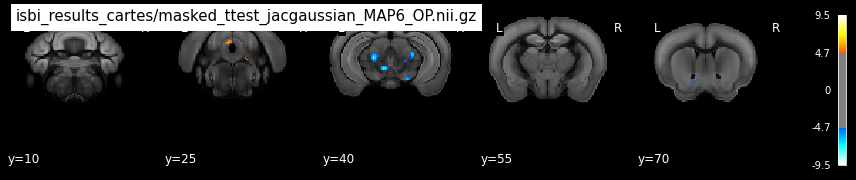

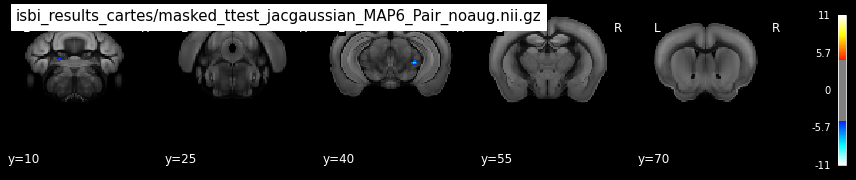

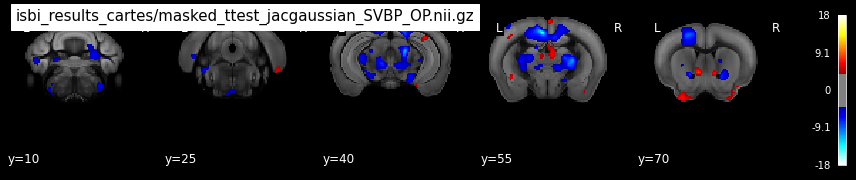

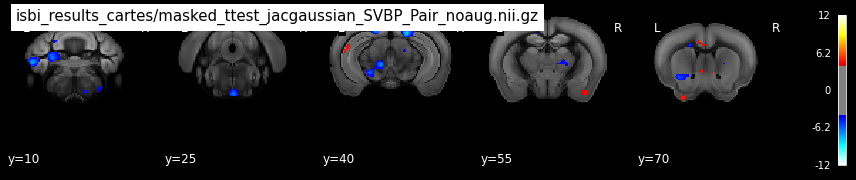

In [6]:
from nilearn.plotting import plot_stat_map
from scipy.stats import t

dofmap6=9
dofSBP8=14
alpha=0.001
cut_coords=np.arange(10,80,15)
for item in sorted(glob.glob('isbi_results_cartes/masked*MAP6*')) :
    thr=t.ppf(1-alpha/2, 9)
    print(item)
    plot_stat_map(item, bg_img="isbi_results_cartes/atlas_allen_mri.nii.gz", cut_coords=cut_coords, output_file=None, display_mode='y', colorbar=True,threshold=thr,title=item)
for item in sorted(glob.glob('isbi_results_cartes/masked*SVBP*')) :
    thr=t.ppf(1-alpha/2, 14)
    print(item)
    plot_stat_map(item, bg_img="isbi_results_cartes/atlas_allen_mri.nii.gz", cut_coords=cut_coords, output_file=None, display_mode='y', colorbar=True,threshold=thr,title=item)

isbi_results_cartes/masked_ttest_jacgaussian_MAP6_OP.nii.gz
isbi_results_cartes/masked_ttest_jacgaussian_MAP6_Pair_noaug.nii.gz


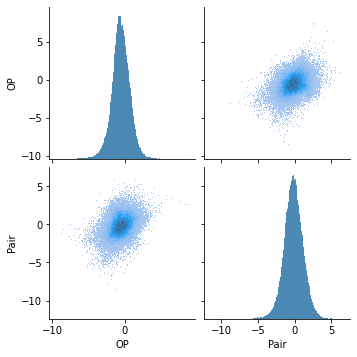

isbi_results_cartes/masked_ttest_jacgaussian_SVBP_OP.nii.gz
isbi_results_cartes/masked_ttest_jacgaussian_SVBP_Pair_noaug.nii.gz


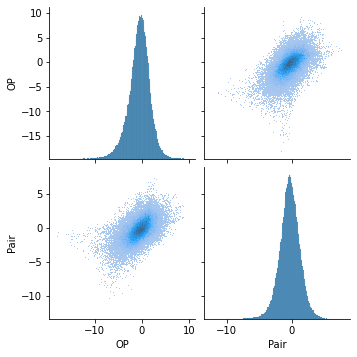

In [7]:
ind=np.where(nib.load("isbi_results_cartes/atlas_allen_mask.nii.gz").get_fdata()>0)
for item in sorted(glob.glob('isbi_results_cartes/masked*OP*')) :
    print(item)
    item2=item.replace("OP","Pair_noaug")
    print(item2)
    data1=nib.load(item).get_fdata()
    data2=nib.load(item2).get_fdata()
    df=pd.DataFrame()
    df["OP"]=data1[ind]
    df["Pair"]=data2[ind]
    
    sns.pairplot(df,kind="hist")
    plt.show()
    

In [9]:
import pingouin as pg

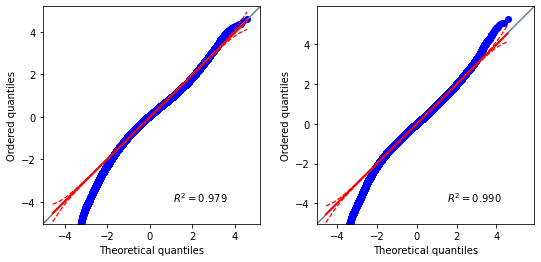

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1 = pg.qqplot(data1[ind], dist='norm', ax=ax1, confidence=False)
ax2 = pg.qqplot(data2[ind], dist='norm', ax=ax2)


In [15]:
resP={"MAP6":[],"SVBP":[]}
resP["MAP6"]

[]

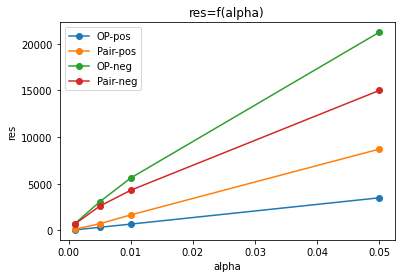

In [42]:
ind=np.where(nib.load("isbi_results_cartes/atlas_allen_mask.nii.gz").get_fdata()>0)
alpha=0.001

dico={"MAP6":9,"SVBP":14}
resP={"MAP6":[],"SVBP":[]}
resN={"MAP6":[],"SVBP":[]}

listAlpha=sorted([0.01,0.05,0.005,0.001])
for alpha in  listAlpha :
    for gr,dof in dico.items() :
        for item in sorted(glob.glob('isbi_results_cartes/masked*'+gr+'*OP*')):
            item2=item.replace("OP","Pair_noaug")
            data1=nib.load(item).get_fdata()
            data2=nib.load(item2).get_fdata()
            thr=t.ppf(1-alpha/2, dof) 
            posop = len(np.where(data1>thr)[0])
            pospair = len(np.where(data2>thr)[0])
            negop = len(np.where(data1<-1.*thr)[0])
            negpair = len(np.where(data2<-1.*thr)[0])
            if "MAP6" in item:
                resP["MAP6"].append({"op": posop, "pair": pospair, "alpha": alpha})
                resN["MAP6"].append({"op": negop, "pair": negpair, "alpha": alpha})            
            elif "SVBP" in item:
                resP["SVBP"].append({"op": posop, "pair": pospair, "alpha": alpha})
                resN["SVBP"].append({"op": negop, "pair": negpair, "alpha": alpha})

for sub in ["MAP6", "SVBP"]:
    y1 = []
    y2 = []
    x1 = []
    y3 = []
    y4 = []
    for i in resP[sub]:
        y1.append(i['op'])
        y2.append(i['pair'])
        x1.append(i['alpha'])
    for i in resN[sub]:
        y3.append(i['op'])
        y4.append(i['pair'])
    plt.plot(x1, y1, 'o-', label='OP-pos')
    plt.plot(x1, y2, 'o-', label='Pair-pos')
    plt.plot(x1, y3, 'o-', label='OP-neg')
    plt.plot(x1, y4, 'o-', label='Pair-neg')
    plt.title("res=f(alpha)")
    plt.xlabel("alpha")
    plt.ylabel("res")
    plt.legend()
    plt.show()
    break
    
    